In [162]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [163]:
aggregation_time_frame = 60 * 30 # 1h
dfs = []

for omega in (10, 25, 50, 100):
    df = pd.read_csv(f"log_{omega}.csv")
    df["time_seconds"] = df["time_seconds"] - df["time_seconds"].min()
    df = df.set_index("time_seconds")

    # Normalize the index relative to its first value
    # print(df.index)

    # Compute node_edge_difference before setting the MultiIndex
    df["graph_density"] = df["number_of_edges"] / (df["number_of_nodes"] * (df["number_of_nodes"] - 1))

    df.columns = pd.MultiIndex.from_product([[omega], df.columns])

    dfs.append(df)

# Concatenating while preserving the order of columns
data_frame = pd.concat(dfs, axis=1).sort_index(axis=1)
data_frame = data_frame.swaplevel(0, 1, axis=1)
data_frame["minute"] = data_frame.index // 60
data_frame

,graph_density,interval_length_delta,iterations_rate,iterations_total,memory_usage_bytes,number_of_edges,number_of_nodes,seed_interval_length,graph_density,interval_length_delta,...,seed_interval_length,graph_density,interval_length_delta,iterations_rate,iterations_total,memory_usage_bytes,number_of_edges,number_of_nodes,seed_interval_length,minute
,10,10,10,10,10,10,10,10,25,25,...,50,100,100,100,100,100,100,100,100,
time_seconds,,,,,,,,,,,,,,,,,,,,,
0.000000,1.500000,0.0,19879.939249,18070.0,1.188248e+10,3.0,2.0,8.0,1.5,0.0,...,8.0,0.055336,0.0,14696.212388,12947.0,1.243218e+10,28.0,23.0,62.0,0.0
1.149351,1.500000,0.0,60395.724322,124313.0,1.175254e+10,3.0,2.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2.494444,0.333333,0.0,64925.658605,220968.0,1.161286e+10,4.0,4.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2.535024,1.500000,0.0,65505.308611,225599.0,1.161285e+10,3.0,2.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3.495439,1.500000,0.0,58772.654430,258858.0,1.145723e+10,3.0,2.0,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37679.320177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163158,0.0,916.338261,34527810.0,4.733551e+09,62.0,20.0,55.0,627.0
37679.320797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.163158,0.0,916.338246,34527810.0,4.733567e+09,62.0,20.0,55.0,627.0


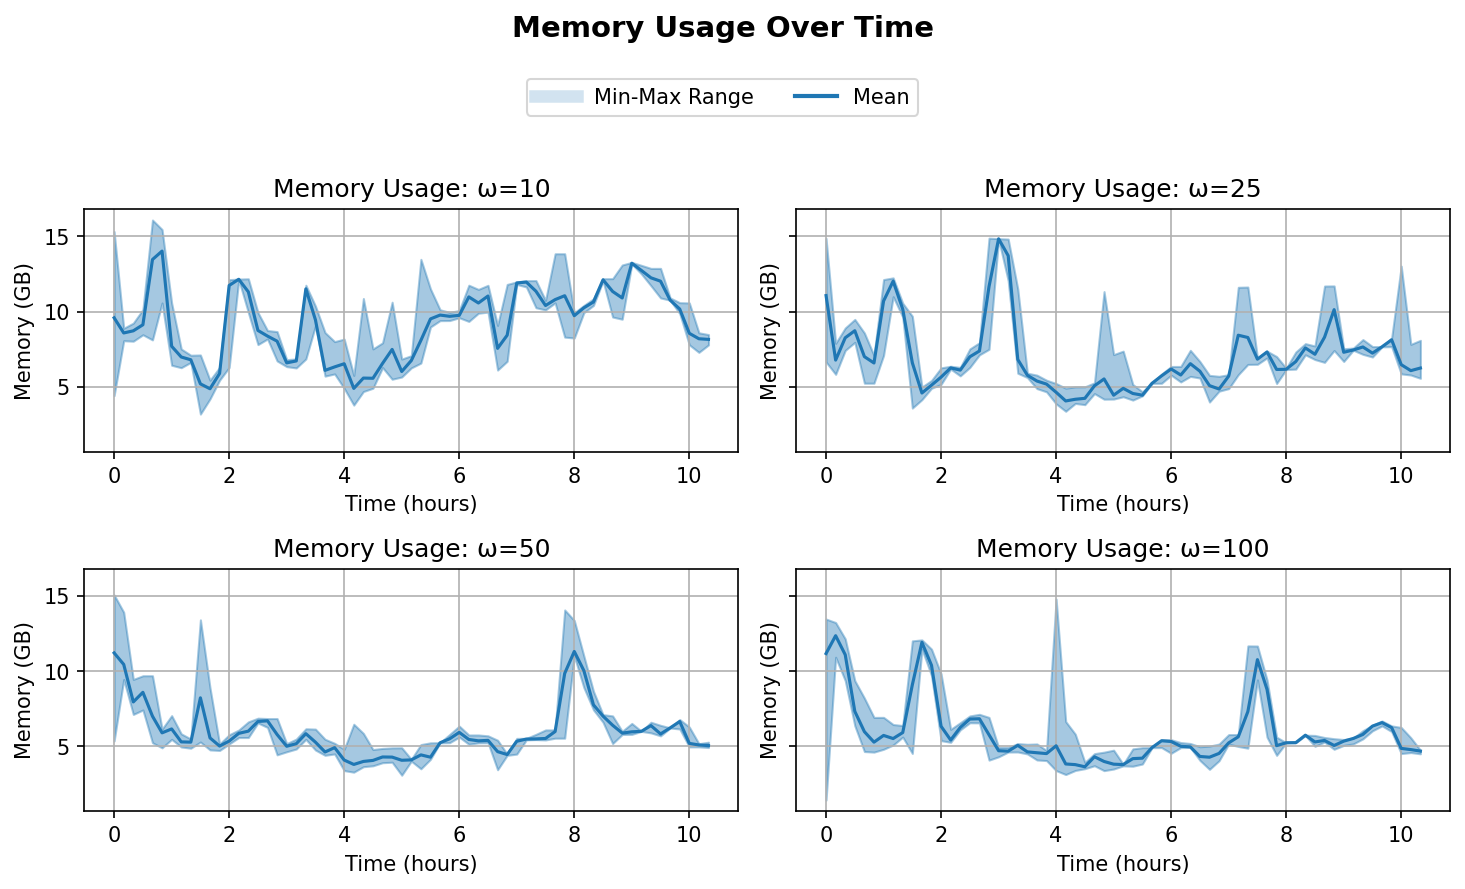

In [167]:
import matplotlib.pyplot as plt
import pandas as pd
aggregation_minutes = 10

dfxs = data_frame.xs("memory_usage_bytes", axis=1)
dfxs /= 1e9  # Convert to GB
dfxs.index = data_frame.index // (60 * aggregation_minutes)  # Convert index from seconds to hours

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(10, 6), dpi=150)
axs = axs.flatten()

for i, omega in enumerate(dfxs):
    ax = axs[i]
    omega_series = dfxs[omega]
    omega_series_grouped = omega_series.groupby(omega_series.index)

    groups = np.array(list(omega_series_grouped.groups.keys()))
    groups *= aggregation_minutes
    groups /= 60

    series_min = omega_series_grouped.min()
    series_25 = omega_series_grouped.quantile(.25)
    series_median = omega_series_grouped.median()
    series_mean = omega_series_grouped.mean()
    series_75 = omega_series_grouped.quantile(.75)
    series_max = omega_series_grouped.max()

    ax.fill_between(groups, series_min , series_max , alpha=0.4, color="tab:blue")
    ax.plot(groups, series_mean, color="tab:blue")

    ax.set_title(f"Memory Usage: ω={omega}")  # Subplot title
    ax.set_xlabel("Time (hours)")
    ax.grid(True)

# Format the y-axis to show values in gigabytes
for ax in axs:
    ax.set_ylabel("Memory (GB)")

# Main title
fig.suptitle("Memory Usage Over Time", fontsize=14, fontweight="bold")

# Add a single legend under the title
handles = [
    plt.Line2D([0], [0], color="tab:blue", alpha=0.2, lw=6, label="Min-Max Range"),
    plt.Line2D([0], [0], color="tab:blue", lw=2, label="Mean"),
]
fig.legend(handles=handles, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 0.92))

fig.tight_layout(rect=[0, 0, 1, 0.88])  # Adjust layout to fit title & legend

plt.show()

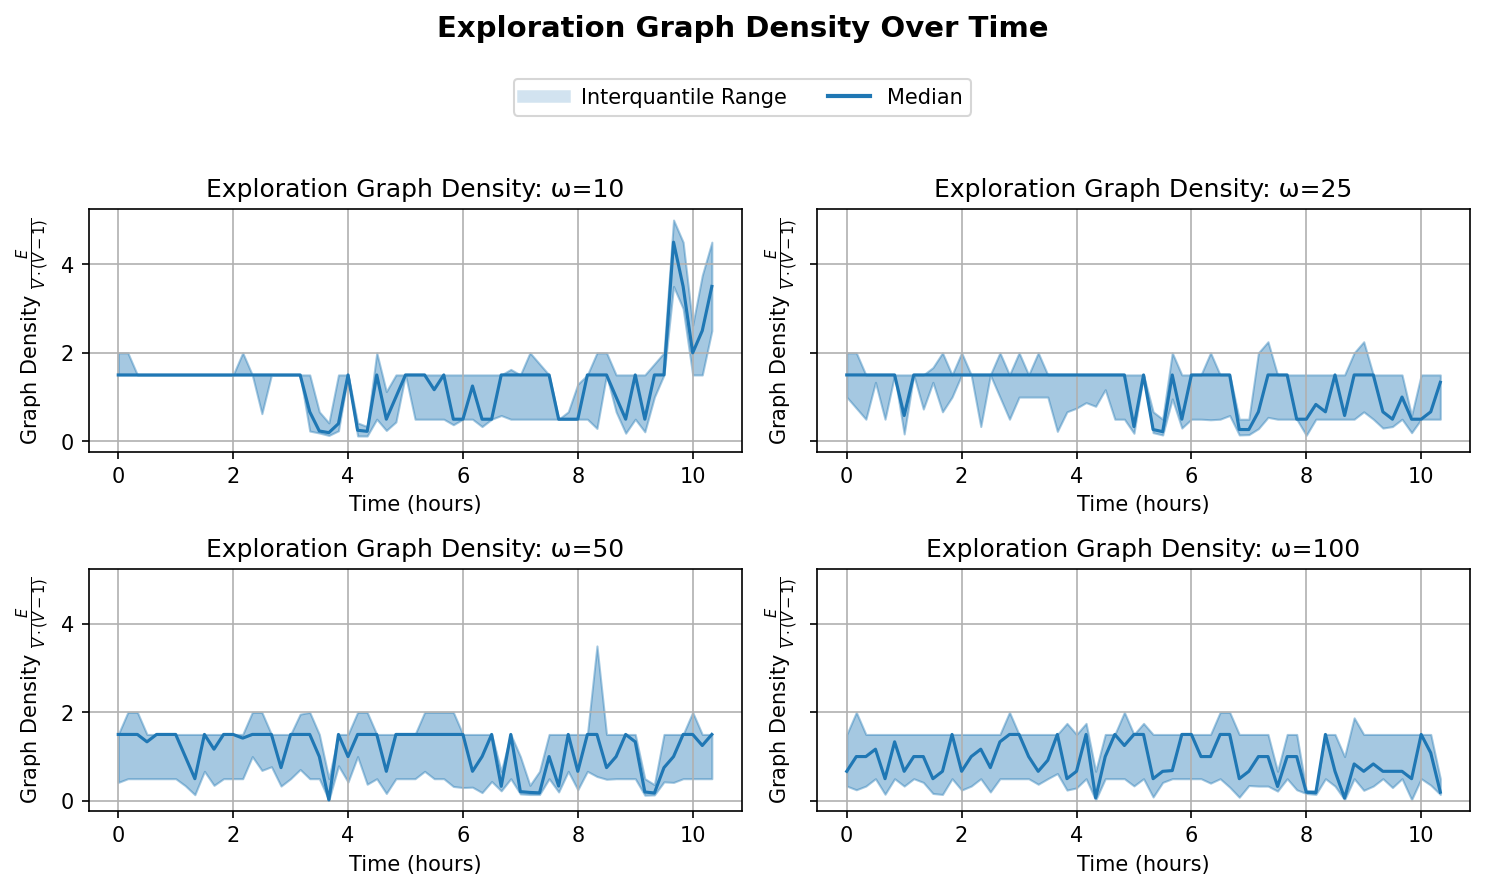

In [165]:
import matplotlib.pyplot as plt
import pandas as pd

aggregation_minutes = 10

dfxs = data_frame.xs("graph_density", axis=1)
dfxs.index = data_frame.index // (60 * aggregation_minutes)  # Convert index from seconds to hours

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(10, 6), dpi=150)
axs = axs.flatten()

for i, omega in enumerate(dfxs):
    ax = axs[i]
    omega_series = dfxs[omega]
    omega_series_grouped = omega_series.groupby(omega_series.index)

    groups = np.array(list(omega_series_grouped.groups.keys()))
    groups *= aggregation_minutes
    groups /= 60

    series_min = omega_series_grouped.min()
    series_25 = omega_series_grouped.quantile(.25)
    series_median = omega_series_grouped.median()
    series_mean = omega_series_grouped.mean()
    series_75 = omega_series_grouped.quantile(.75)
    series_max = omega_series_grouped.max()


    ax.fill_between(groups, series_25, series_75, alpha=0.4, color="tab:blue")
    # ax.plot(groups, series_min , alpha=0.1, color="tab:blue")
    # ax.plot(groups, series_max , alpha=0.1, color="tab:blue")
    ax.plot(groups, series_median,  color="tab:blue")

    ax.set_title(f"Exploration Graph Density: ω={omega}")  # Subplot title
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel(r"Graph Density $\frac{E}{V\cdot(V-1)}$")
    ax.grid(True)

# Main title
fig.suptitle("Exploration Graph Density Over Time", fontsize=14, fontweight="bold")

# Add a single legend under the title
handles = [
    plt.Line2D([0], [0], color="tab:blue", alpha=0.2, lw=6, label="Interquantile Range"),
    plt.Line2D([0], [0], color="tab:blue", lw=2, label="Median"),
]
fig.legend(handles=handles, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 0.92))

fig.tight_layout(rect=[0, 0, 1, 0.88])  # Adjust layout to fit title & legend

plt.show()

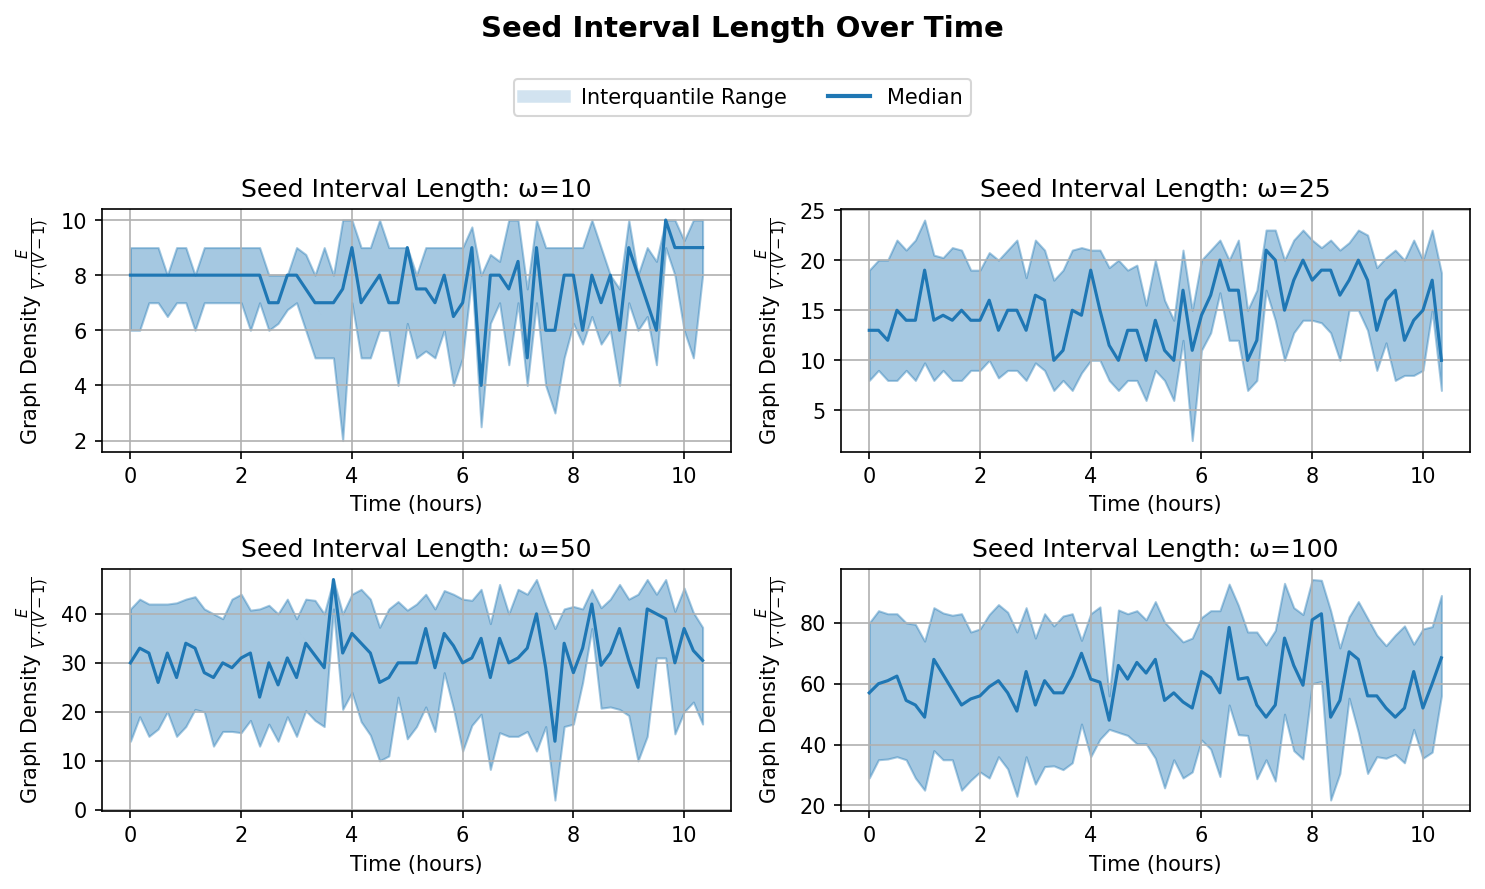

In [166]:
import matplotlib.pyplot as plt
import pandas as pd

aggregation_minutes = 10

dfxs = data_frame.xs("seed_interval_length", axis=1)
dfxs.index = data_frame.index // (60 * aggregation_minutes)  # Convert index from seconds to hours

fig, axs = plt.subplots(2, 2, sharey=False, figsize=(10, 6), dpi=150)
axs = axs.flatten()

for i, omega in enumerate(dfxs):
    ax = axs[i]
    omega_series = dfxs[omega]
    omega_series_grouped = omega_series.groupby(omega_series.index)

    groups = np.array(list(omega_series_grouped.groups.keys()))
    groups *= aggregation_minutes
    groups /= 60

    series_min = omega_series_grouped.min()
    series_25 = omega_series_grouped.quantile(.25)
    series_median = omega_series_grouped.median()
    series_mean = omega_series_grouped.mean()
    series_75 = omega_series_grouped.quantile(.75)
    series_max = omega_series_grouped.max()


    ax.fill_between(groups, series_25, series_75, alpha=0.4, color="tab:blue")
    # ax.plot(groups, series_min , alpha=0.1, color="tab:blue")
    # ax.plot(groups, series_max , alpha=0.1, color="tab:blue")
    ax.plot(groups, series_median,  color="tab:blue")

    ax.set_title(f"Seed Interval Length: ω={omega}")  # Subplot title
    ax.set_xlabel("Time (hours)")
    ax.set_ylabel(r"Graph Density $\frac{E}{V\cdot(V-1)}$")
    ax.grid(True)

# Main title
fig.suptitle("Seed Interval Length Over Time", fontsize=14, fontweight="bold")

# Add a single legend under the title
handles = [
    plt.Line2D([0], [0], color="tab:blue", alpha=0.2, lw=6, label="Interquantile Range"),
    plt.Line2D([0], [0], color="tab:blue", lw=2, label="Median"),
]
fig.legend(handles=handles, loc="upper center", ncol=2, bbox_to_anchor=(0.5, 0.92))

fig.tight_layout(rect=[0, 0, 1, 0.88])  # Adjust layout to fit title & legend

plt.show()